In [2]:
import pandas as pd


In [3]:

data = pd.read_csv('0304.csv')
data.head()

,醫事機構代碼,成人口罩剩餘數,兒童口罩剩餘數,來源資料時間
0,0145080011,2179,1608,2020/03/04 22:00:40
1,0291010010,606,864,2020/03/04 22:00:40
2,2101010013,149,1837,2020/03/04 22:00:40
3,2101020019,16,1448,2020/03/04 22:00:40
4,2101090011,0,1160,2020/03/04 22:00:40


In [4]:
data_group = data.groupby('醫事機構代碼')
index = data_group['醫事機構代碼'].unique()

In [5]:
data_group = data.groupby('醫事機構代碼')
data_group = data_group[['醫事機構代碼', '成人口罩剩餘數','兒童口罩剩餘數','來源資料時間']]
data_group.head()

,醫事機構代碼,成人口罩剩餘數,兒童口罩剩餘數,來源資料時間
0,0145080011,2179,1608,2020/03/04 22:00:40
1,0291010010,606,864,2020/03/04 22:00:40
2,2101010013,149,1837,2020/03/04 22:00:40
3,2101020019,16,1448,2020/03/04 22:00:40
4,2101090011,0,1160,2020/03/04 22:00:40
...,...,...,...,...
1446222,5936051389,1,0,2020/03/04 10:21:39
1452862,5936040171,0,8,2020/03/04 10:19:11
1452867,5936051389,1,0,2020/03/04 10:19:11
1459512,5936051389,3,0,2020/03/04 10:17:11


In [6]:

print(type(index[0])," ", index[0][0])

<class 'numpy.ndarray'>   0145080011


In [7]:
data_1 = data_group.get_group(index[2][0]).sort_values(by=['來源資料時間'])
data_1.shape

(223, 4)

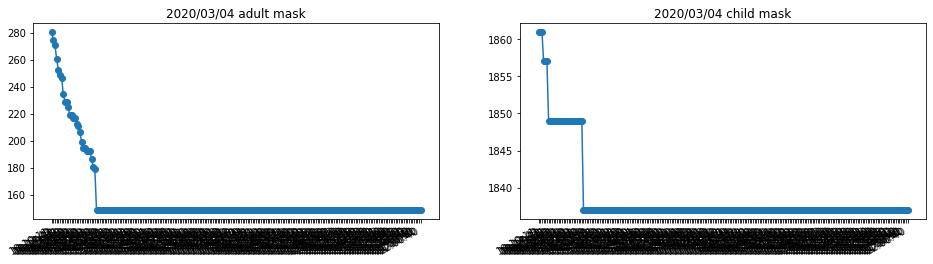

In [9]:
import matplotlib.pyplot as plt



y_adult = data_1['成人口罩剩餘數']
y_child = data_1['兒童口罩剩餘數']

t = data_1['來源資料時間']
t = pd.to_datetime(t)
date = t.dt.strftime("%Y/%m/%d")
t = t.dt.strftime("%H:%M:%S")
date = date.iloc[0]

fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
 
ax = axes[0]
ax.plot(t, y_adult, 'o-')
ax.set_title(date+" adult mask")
fig.autofmt_xdate() 

ax = axes[1]
ax.plot(t, y_child, 'o-')
ax.set_title(date+" child mask")
fig.autofmt_xdate()
plt.show()